170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


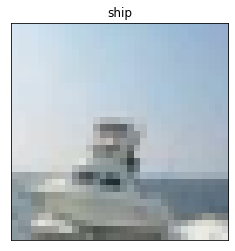

min and max value in image:  30 242


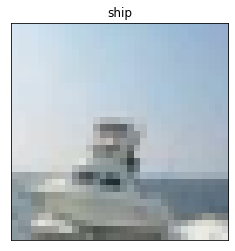

min and max value in image:  0.11764706 0.9490196


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())


def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(str(label_names[labels[i]]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

# Variables to keep track of image size - 32 by 32 pixel image size
img_rows = 32
img_cols = 32  

# The number of posssible output classes in this dataset
num_classes = 10 

# The names of each output class. 
# The network will use numbers to represent each of these, but you will need to decode the networks guess using this list. 
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load the data in. Just like before, add a backup of untouched images. 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data() 
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data() 

# Convert the train and test labels to the right kind of list
train_labels_backup = [item for sublist in train_labels_backup for item in sublist]
test_labels_backup = [item for sublist in test_labels_backup for item in sublist]

# Print out the shape of the train and test images to make sure it matches the expectations
print(train_images.shape) 
print(test_images.shape) 

# Set a variable to keep track of input shape. 
input_shape = (img_rows, img_cols, 3)

# Print out the 100th image
plot_image(train_images, 100, train_labels_backup)
# Show it's min and max value
show_min_max(train_images, 100)

# Reformat the data to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the values by dividing by 255
train_images /= 255
test_images /= 255

# Print out the image and min/max values again to make sure it is normalized
plot_image(train_images, 100, train_labels_backup)
show_min_max(train_images, 100)

# Convert the labels using one-hot encoding 
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)